# Lexical Analysis — Visualization & Interpretation Notebook

This notebook visualizes outputs generated by `src/analysis/compare_corpora.py` and provides text templates you can copy into the report. **Run the notebook after** you have executed `compare_corpora.py` so that CSV files exist under `results/statistics/`.

**How to use:**
1. Ensure you have generated the analysis results: `python src/analysis/compare_corpora.py`.
2. Run the cells below sequentially.
3. Replace interpretation placeholders with your observations.

If some CSVs are missing the cells will show warnings — that's normal if a step was skipped.

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style='whitegrid')
%matplotlib inline

BASE = Path("C:\\Users\\hp\\Desktop\\Projet_NLP\\results") / 'statistics'
print('Looking for outputs in:', BASE)
    

Looking for outputs in: C:\Users\hp\Desktop\Projet_NLP\results\statistics


In [47]:
summary_path = BASE / 'summary.json'
print('Checking for summary at:', summary_path)

if summary_path.exists():
    summary = pd.read_json(summary_path)
    print('Summary keys:', summary.keys())
else:
    print('No summary.json found. Make sure you ran compare_corpora.py')


Checking for summary at: C:\Users\hp\Desktop\Projet_NLP\results\statistics\summary.json
Summary keys: Index(['gaza_n_docs', 'ukraine_n_docs', 'files'], dtype='object')


## Top words — Gaza & Ukraine

This cell loads the `gaza_wordfreq.csv` and `ukraine_wordfreq.csv` files and plots the top 20 words.

Gaza top 5:


,term,count
0,gaza,765
1,hamas,627
2,israel,578
3,palestinian,425
4,israeli,422


Ukraine top 5:


,term,count
0,ukraine,1432
1,russia,1077
2,russian,812
3,war,673
4,ukrainian,606


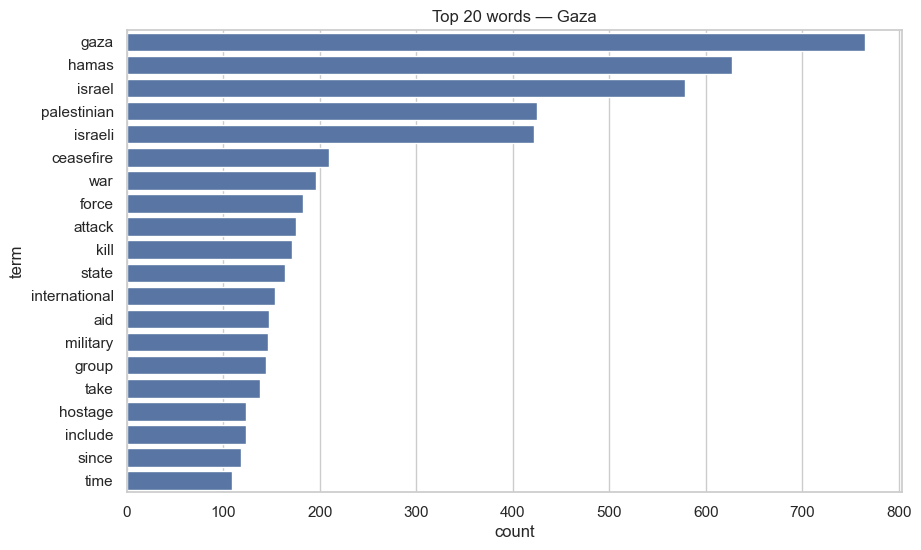

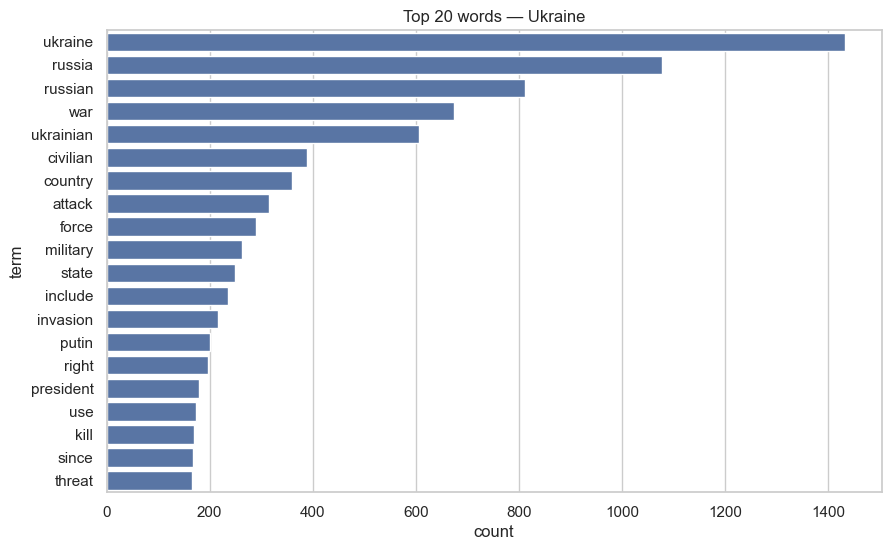

In [48]:
def load_wordfreq(name):
    p = BASE / f'{name}_wordfreq.csv'
    if not p.exists():
        print('Missing', p)
        return None
    df = pd.read_csv(p)
    return df

wg = load_wordfreq('gaza')
wk = load_wordfreq('ukraine')

if wg is not None:
    print('Gaza top 5:')
    display(wg.head())
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(x='count', y='term', data=wg.head(20), ax=ax)
    ax.set_title('Top 20 words — Gaza')

if wk is not None:
    print('Ukraine top 5:')
    display(wk.head())
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(x='count', y='term', data=wk.head(20), ax=ax)
    ax.set_title('Top 20 words — Ukraine')


## TF-IDF — top discriminative terms per corpus

Load `tfidf_gaza.csv` and `tfidf_ukraine.csv` and display top terms.

In [49]:
tg = BASE / 'tfidf_gaza.csv'
tu = BASE / 'tfidf_ukraine.csv'

if tg.exists():
    df_tg = pd.read_csv(tg)
    display(df_tg.head(30))
else:
    print('tfidf_gaza.csv not found')

if tu.exists():
    df_tu = pd.read_csv(tu)
    display(df_tu.head(30))
else:
    print('tfidf_ukraine.csv not found')


,term,score
0,gaza,0.094852
1,hamas,0.092490
2,israel,0.076423
3,israeli,0.058052
4,palestinian,0.053771
5,ceasefire,0.037527
6,force,0.029569
7,kill,0.029459
8,war,0.028398
9,attack,0.028365


,term,score
0,russia,0.087524
1,russian,0.073835
2,ukrainian,0.053143
3,civilian,0.034075
4,country,0.032875
5,force,0.028771
6,putin,0.027532
7,mr,0.026894
8,military,0.026783
9,attack,0.026021


## Log-odds (discriminative words Gaza vs Ukraine)

This uses the `gaza_vs_ukraine_logodds_top200.csv` output. Positive z indicates over-representation in Gaza, negative in Ukraine.

,term,count_a,count_b,logodds,z
0,gaza,765,5,5.474926,12.214612
1,israel,578,5,5.194628,11.577087
2,ceasefire,210,12,3.307888,11.149267
3,hamas,627,3,5.785495,10.013453
4,palestinian,425,3,5.396646,9.329851
5,group,144,57,1.373129,8.775332
6,israeli,422,2,5.793367,8.194025
7,aid,147,72,1.160169,8.065830
8,fox,83,4,3.476643,6.799671
9,terrorist,68,6,2.872703,6.750560


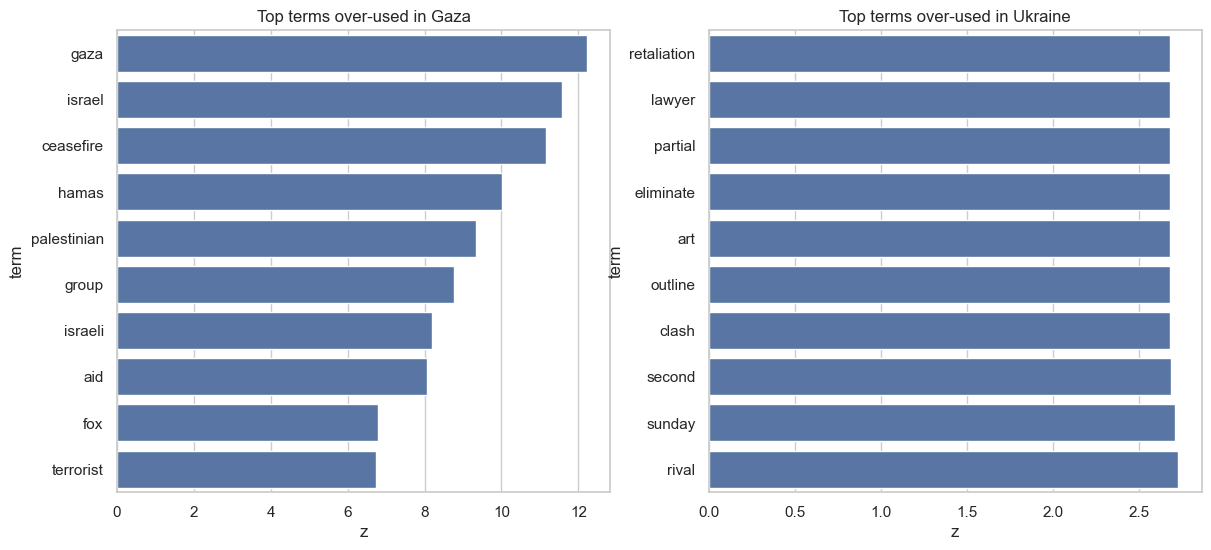

In [50]:
p = BASE / 'gaza_vs_ukraine_logodds_top200.csv'
if p.exists():
    df_log = pd.read_csv(p)
    display(df_log.head(20))
    # plot top positive and top negative
    fig, axes = plt.subplots(1,2,figsize=(14,6))
    top_pos = df_log.head(10)
    top_neg = df_log.tail(10).iloc[::-1]
    sns.barplot(x='z', y='term', data=top_pos, ax=axes[0]); axes[0].set_title('Top terms over-used in Gaza')
    sns.barplot(x='z', y='term', data=top_neg, ax=axes[1]); axes[1].set_title('Top terms over-used in Ukraine')
else:
    print('Log-odds file not found')


## Actor contexts — frequent words around actors

These files are saved as `{corpus}_actor_{actor}_context.csv`. Example: `gaza_actor_palestin_context.csv`. The table shows words that commonly appear near mentions of the actor.

In [51]:
actors = ['palestin','israel','ukraine','russia']
for actor in actors:
    f_g = BASE / f'gaza_actor_{actor}_context.csv'
    f_u = BASE / f'ukraine_actor_{actor}_context.csv'
    if f_g.exists():
        print('Gaza contexts for', actor)
        display(pd.read_csv(f_g).head(20))
    if f_u.exists():
        print('Ukraine contexts for', actor)
        display(pd.read_csv(f_u).head(20))


Gaza contexts for palestin


,term,count
0,gaza,445
1,israel,385
2,hamas,270
3,israeli,267
4,palestinian,230
5,kill,123
6,ceasefire,117
7,group,114
8,attack,106
9,war,102


Ukraine contexts for palestin


,term,count
0,war,4
1,israel,4
2,ukraine,3
3,say,2
4,example,2
5,fake,2
6,emerge,2
7,weapon,2
8,found,2
9,hamas,2


Gaza contexts for israel


,term,count
0,gaza,440
1,hamas,372
2,palestinian,280
3,israel,225
4,israeli,183
5,attack,164
6,force,140
7,kill,140
8,ceasefire,129
9,military,125


Ukraine contexts for israel


,term,count
0,war,5
1,hamas,4
2,ukraine,4
3,putin,3
4,found,3
5,operation,2
6,russia,2
7,use,2
8,example,2
9,fake,2


Gaza contexts for ukraine


,term,count
0,ukrainealert,3
1,analysis,3
2,commentary,2
3,arm,2
4,force,2
5,british,2
6,comprehensive,1
7,online,1
8,publication,1
9,provide,1


Ukraine contexts for ukraine


,term,count
0,russia,763
1,ukraine,690
2,russian,537
3,war,470
4,ukrainian,304
5,country,259
6,military,227
7,force,227
8,invasion,208
9,civilian,164


Gaza contexts for russia


,term,count
0,stem,1
1,migratory,1
2,flow,1
3,europe,1
4,curb,1
5,north,1
6,africa,1
7,reliance,1
8,energy,1
9,mattei,1


Ukraine contexts for russia


,term,count
0,ukraine,1041
1,russia,737
2,russian,485
3,war,414
4,ukrainian,387
5,threat,328
6,force,278
7,disinformation,266
8,provocation,265
9,truth,260


## POS contexts (Adjectives / Verbs / Nouns) around actors

These files are saved as `{corpus}_actor_{actor}_ADJ.csv`, `{...}_VERB.csv`, etc. They show which adjectives or verbs typically modify or appear near the actor.

In [52]:
for actor in actors:
    for pos in ['ADJ','VERB','NOUN']:
        f_g = BASE / f'gaza_actor_{actor}_{pos}.csv'
        f_u = BASE / f'ukraine_actor_{actor}_{pos}.csv'
        if f_g.exists():
            print('Gaza', actor, pos)
            display(pd.read_csv(f_g).head(20))
        if f_u.exists():
            print('Ukraine', actor, pos)
            display(pd.read_csv(f_u).head(20))


Gaza palestin ADJ


,token,count
0,palestinian,543
1,israeli,166
2,hamas,132
3,gaza,85
4,israel,72
5,military,42
6,civilian,29
7,east,29
8,terrorist,27
9,political,23


Ukraine palestin ADJ


,token,count
0,palestinian,3
1,fake,2
2,optimistic,1
3,fighter,1
4,ukraine,1
5,great,1
6,black,1
7,social,1
8,brown,1
9,label,1


Gaza palestin VERB


,token,count
0,hamas,113
1,take,44
2,include,33
3,kill,31
4,remains,30
5,go,21
6,gaza,21
7,remain,20
8,make,18
9,want,17


Ukraine palestin VERB


,token,count
0,hamas,2
1,found,2
2,end,1
3,rubio,1
4,struck,1
5,fabricates,1
6,do,1
7,afghanistan,1
8,palestine,1
9,hold,1


Gaza palestin NOUN


,token,count
0,hamas,507
1,gaza,190
2,israel,157
3,palestine,86
4,group,84
5,ceasefire,77
6,war,73
7,state,57
8,kill,56
9,attack,54


Ukraine palestin NOUN


,token,count
0,israel,3
1,war,2
2,emerge,2
3,weapon,2
4,administration,1
5,effort,1
6,hamas,1
7,mr,1
8,tone,1
9,information,1


Gaza israel ADJ


,token,count
0,israeli,483
1,israel,207
2,palestinian,173
3,military,102
4,gaza,51
5,international,41
6,hamas,34
7,civilian,33
8,southern,25
9,least,22


Ukraine israel ADJ


,token,count
0,ukraine,3
1,israeli,2
2,great,2
3,february,2
4,israel,1
5,sixday,1
6,nonisraeli,1
7,guardian,1
8,optimistic,1
9,narrative,1


Gaza israel VERB


,token,count
0,israel,39
1,take,39
2,kill,32
3,hamas,29
4,remains,29
5,include,25
6,continue,20
7,gaza,17
8,get,17
9,remain,16


Ukraine israel VERB


,token,count
0,found,2
1,end,1
2,rubio,1
3,struck,1
4,hamas,1
5,fabricates,1
6,egypt,1
7,hold,1


Gaza israel NOUN


,token,count
0,israel,425
1,gaza,226
2,hamas,164
3,attack,109
4,force,107
5,ceasefire,76
6,war,70
7,kill,63
8,hostage,59
9,state,50


Ukraine israel NOUN


,token,count
0,war,5
1,israel,4
2,putin,2
3,use,2
4,idf,2
5,murder,2
6,desert,1
7,storm,1
8,operation,1
9,iraqi,1


Gaza ukraine ADJ


,token,count
0,ukraine,3
1,regular,1
2,civil,1
3,expert,1
4,activist,1
5,global,1
6,late,1
7,unfold,1
8,humanitarian,1
9,environmental,1


Ukraine ukraine ADJ


,token,count
0,ukraine,1561
1,ukrainian,754
2,russian,312
3,military,154
4,civilian,94
5,february,86
6,european,74
7,united,62
8,human,56
9,nato,55


Gaza ukraine VERB


,token,count
0,politician,1
1,put,1
2,include,1


Ukraine ukraine VERB


,token,count
0,include,65
1,make,48
2,continue,45
3,russia,45
4,continued,31
5,take,30
6,see,27
7,go,25
8,remain,25
9,come,20


Gaza ukraine NOUN


,token,count
0,force,2
1,publication,1
2,analysis,1
3,development,1
4,politics,1
5,economy,1
6,society,1
7,culture,1
8,widearray,1
9,thoughtleaders,1


Ukraine ukraine NOUN


,token,count
0,russia,414
1,war,304
2,country,165
3,ukraine,162
4,force,151
5,invasion,147
6,attack,99
7,president,96
8,state,94
9,number,89


Gaza russia ADJ


,token,count
0,africa,1
1,russian,1
2,represent,1


Ukraine russia ADJ


,token,count
0,russian,1062
1,ukraine,610
2,ukrainian,213
3,russia,169
4,military,167
5,february,96
6,civilian,58
7,fullscale,56
8,european,56
9,western,46


Gaza russia VERB


,token,count


Ukraine russia VERB


,token,count
0,russia,96
1,include,74
2,continued,39
3,continue,37
4,make,31
5,take,26
6,believe,20
7,begin,20
8,putin,18
9,injured,18


Gaza russia NOUN


,token,count
0,europe,1
1,curb,1
2,north,1
3,reliance,1
4,energy,1
5,mattei,1
6,plan,1


Ukraine russia NOUN


,token,count
0,russia,1047
1,war,282
2,putin,263
3,disinformation,248
4,force,208
5,provocation,187
6,invasion,185
7,truth,183
8,threat,170
9,president,123


## PMI top bigrams (cooccurrence)

PMI-based collocations are saved as `{corpus}_top_pmi_bigrams.csv`. High PMI suggests stronger association than chance.

In [53]:
for cat in ['gaza','ukraine']:
    p = BASE / f'{cat}_top_pmi_bigrams.csv'
    if p.exists():
        print(cat, 'top PMI bigrams')
        display(pd.read_csv(p).head(30))
    else:
        print('Missing', p)


gaza top PMI bigrams


,bigram,pmi
0,columbiana county,15.295185
1,county columbiana,15.295185
2,ism communism,15.294991
3,ism fascism,15.294991
4,communism ism,15.294991
5,fascism ism,15.294991
6,beautiful upward,15.294991
7,upward beautiful,15.294991
8,omer eliya,15.294602
9,eliya omer,15.294602


ukraine top PMI bigrams


,bigram,pmi
0,subset resembles,15.938538
1,resembles subset,15.938538
2,ir kk,15.938538
3,kk ir,15.938538
4,importdependent middleincome,15.938538
5,middleincome importdependent,15.938538
6,tomorrow zaslavskiy,15.938538
7,zaslavskiy tomorrow,15.938538
8,fursenko lyudmyla,15.938538
9,ustymenko lyudmyla,15.938538


## Similarity matrix (cross-corpus)

Loads `similarity_matrix.csv` which contains pairwise cosine similarities across all documents (IDs prefixed by corpus). You can visualize a submatrix or cluster documents.

Similarity matrix shape: (176, 176)


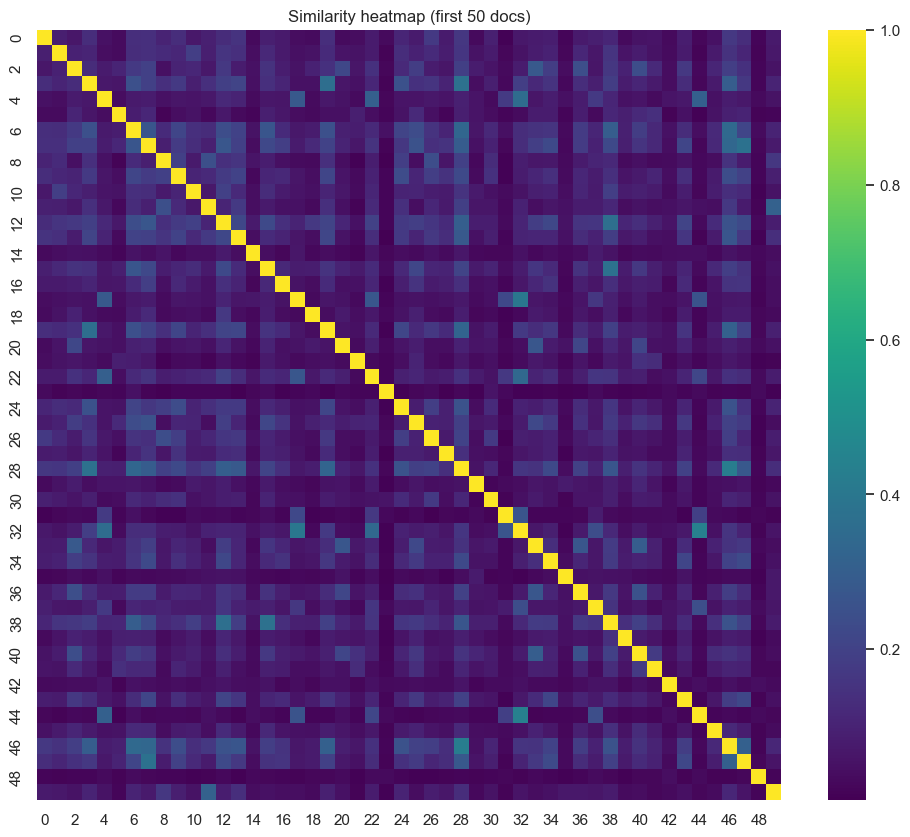

In [54]:
sim_path = BASE / 'similarity_matrix.csv'
if sim_path.exists():
    sim = pd.read_csv(sim_path, index_col=0)
    print('Similarity matrix shape:', sim.shape)
    # show a heatmap of a subset (first 50 docs)
    subset = sim.iloc[:50,:50]
    plt.figure(figsize=(12,10))
    sns.heatmap(subset.values, cmap='viridis')
    plt.title('Similarity heatmap (first 50 docs)')
else:
    print('No similarity matrix found')


## Interpretation templates (copy into your report)

Below are templates you can adapt. Replace bracketed text with your findings.

### 1) Word frequency
**Observation:** The Gaza corpus frequently uses words such as `[top Gaza words]`, while the Ukraine corpus frequently uses `[top Ukraine words]`.

**Interpretation:** This suggests that media coverage for Gaza focuses more on `[humanitarian/military/statistics]`, whereas coverage of Ukraine emphasizes `[military/heroic/diplomacy]`.

### 2) TF-IDF
**Observation:** The top TF-IDF terms for Gaza include `[terms]`, and for Ukraine include `[terms]`.

**Interpretation:** TF-IDF indicates these terms are particularly characteristic to each corpus; this can point to different narrative frames: Gaza → `[frame]`, Ukraine → `[frame]`.

### 3) Log-odds (discriminative terms)
**Observation:** Terms over-represented in Gaza include `[terms]` (positive z), while over-represented in Ukraine include `[terms]` (negative z).

**Interpretation:** The log-odds analysis highlights lexical asymmetries. For instance, a higher presence of `[term]` in Gaza may indicate `[framing/wording]`.

### 4) Actor contexts & POS
**Observation:** Around the actor `[actor]`, frequent adjectives are `[adj list]` and frequent verbs are `[verb list]`.

**Interpretation:** If adjectives for `[actor]` are more dehumanizing or technical, this indicates `[bias type]`. If verbs emphasize agency differently across corpora, that reveals `[difference].`

### 5) Cooccurrence / PMI
**Observation:** Strong collocations in Gaza: `[bigram1, bigram2]`. In Ukraine: `[bigramA, bigramB]`.

**Interpretation:** Collocations reveal typical frames. For example, `[bigram]` suggests a focus on `[frame]`.

### 6) Similarity
**Observation:** Documents from `[media X]` cluster together and show high similarity; Gaza articles appear `[more/less]` homogeneous than Ukraine.

**Interpretation:** Higher homogeneity may reflect repeated use of a stock vocabulary or template reporting style for that conflict.


---

Use these templates as starting points. Add concrete numbers (counts, z-scores, PMI) and short verbatim examples from articles to strengthen your analysis.